In [155]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [156]:
data = pd.read_csv('voice.csv')

In [157]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
meanfreq    3168 non-null float64
sd          3168 non-null float64
median      3168 non-null float64
Q25         3168 non-null float64
Q75         3168 non-null float64
IQR         3168 non-null float64
skew        3168 non-null float64
kurt        3168 non-null float64
sp.ent      3168 non-null float64
sfm         3168 non-null float64
mode        3168 non-null float64
centroid    3168 non-null float64
meanfun     3168 non-null float64
minfun      3168 non-null float64
maxfun      3168 non-null float64
meandom     3168 non-null float64
mindom      3168 non-null float64
maxdom      3168 non-null float64
dfrange     3168 non-null float64
modindx     3168 non-null float64
label       3168 non-null object
dtypes: float64(20), object(1)
memory usage: 519.8+ KB


In [158]:
data.replace('male',0, inplace=True)
data.replace('female',1, inplace=True)

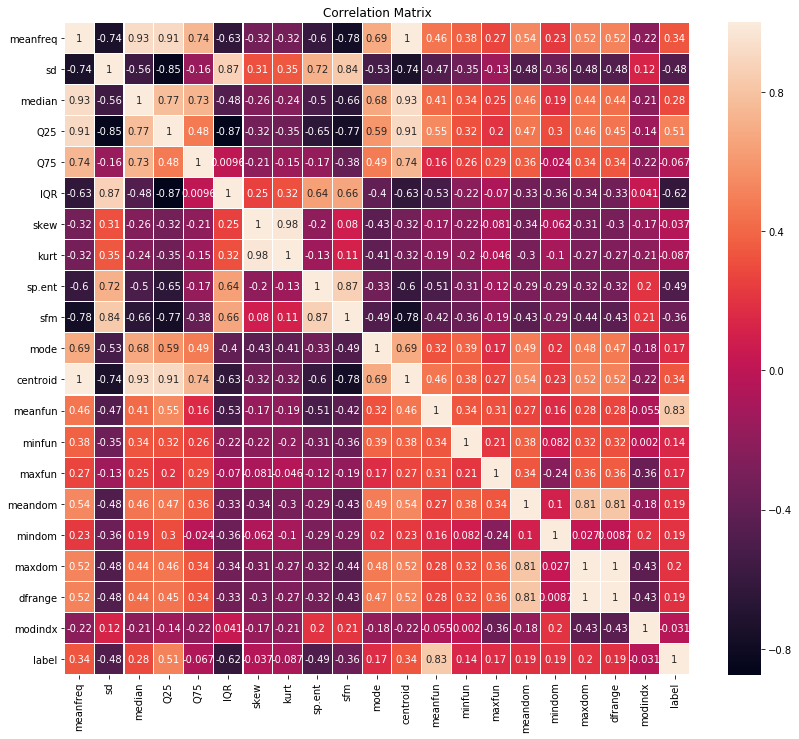

In [159]:
plt.figure(figsize=(14,12))
plt.title('Correlation Matrix')

sns.heatmap(data.corr(), linewidths=0.1, annot=True)

In [166]:
X = data.drop('label', axis = 1)
y = data['label']

In [167]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42) #increase random_state

In [168]:
rfc = RandomForestClassifier(n_estimators = 50)
rfc.fit(X_train, y_train)
scores = cross_val_score(rfc, X, y, cv = 50)
print('Acuracy: ', scores.mean()*100, '%')

Acuracy:  97.13508064516128 %


In [169]:
# Now let's try different classifiers

from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import StandardScaler

In [170]:
classifiers = [
    KNeighborsClassifier(3),
    SVC(probability=True, gamma='scale'),
    DecisionTreeClassifier(),
    RandomForestClassifier(n_estimators=100),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis(),
    LogisticRegression(solver='lbfgs')]

In [171]:
scores = []
for clf in classifiers:
    clf.fit(X_train, y_train)
    cv_results = cross_validate(clf, X_test, y_test, cv=5, return_train_score=True)
    scores.append(np.mean(cv_results['test_score']))

/usr/local/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/usr/local/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/usr/local/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/usr/local/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/usr/local/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/usr/local/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/usr/local/lib/python3.7/site-packages/sklearn

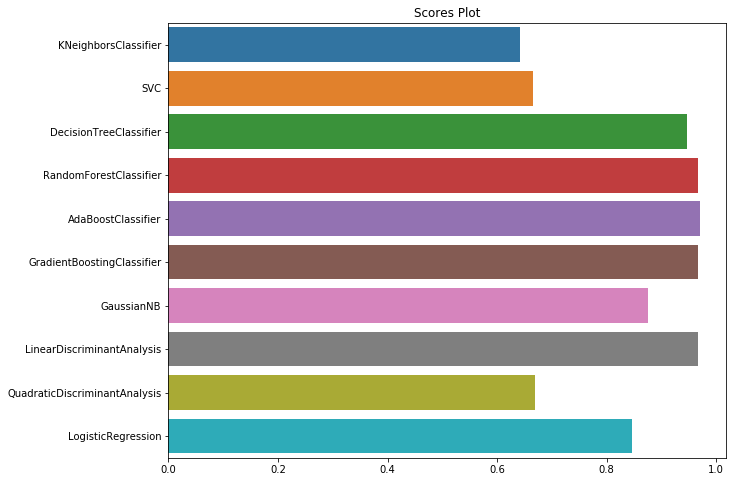

In [172]:
plt.figure(figsize=(10,8))
plt.title('Scores Plot')
sns.barplot(y=[n.__class__.__name__  for n in classifiers], x=scores)

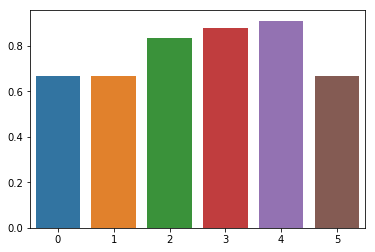

In [196]:
svc_class = [
    
    SVC(probability=True, gamma='scale'),
    SVC(probability=True, C=1.5, gamma='scale'),
    SVC(probability=True, C=200, gamma='scale'),
    SVC(probability=True, C=500,gamma='scale'),
    SVC(probability=True, C=1000,gamma='scale'),
    SVC(probability=True, C=0.5,gamma='scale'),
]

svc_scores = []
for clf in svc_class:
    clf.fit(X_train, y_train)
    cv_results = cross_validate(clf, X_test, y_test, cv=5, return_train_score=True)
    svc_scores.append(np.mean(cv_results['test_score']))
    
sns.barplot(x=[n for n in range(len(svc_class))],y=svc_scores)

In [197]:
print(np.amax(svc_scores))

0.9101107226107226


In [ ]:
# Predictions

prediction = rfc.predict( [[0.1984445, 0.06684052, 0.2157356, 0.1375283, 0.264536, 0.1270077, 3.38914, 20.50335, 0.8929154, 0.3376926, 0.1200362, 0.1984445, 0.1396227, 0.04349112, 0.2791139, 0.4190832, 0, 5.081836, 5.081836, 0.07727807]] )

if prediction[0] == 0:
    print("The subject is a male")
else:
    print("The subject is a female")

In [ ]:
# PCA

from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components = 10)
pca.fit(X)

In [ ]:
y_variance = pca.explained_variance_ratio_

In [ ]:
len(data.columns)

In [ ]:
from sklearn.model_selection import cross_val_score
n = 1
scores = []
while n < len(data.columns):
    pca = PCA(n_components = n)
    pca.fit(X)
    y_variance = pca.explained_variance_ratio_
    X_pca = pca.transform(X)
    rfc = RandomForestClassifier(n_estimators=100)
    scores.append(cross_val_score(rfc, X_pca, y, cv=5).mean())
    n += 1

In [ ]:
scores

In [ ]:
df_scores = pd.DataFrame(scores)

df_scores.plot()

In [ ]:
plt.figure(figsize=(8,6))
plt.title("Accuracy according to n_components")
sns.barplot(x=[i for i in range(1, 21)], y=[round(n*100, 2) for n in scores]).set(xlabel="n_components", ylabel="Accuracy")


In [ ]:
X_pca = pca.transform(X)

In [ ]:
from sklearn.model_selection import cross_val_score
rfc = RandomForestClassifier(n_estimators=100)
cross_val_score(rfc, X_pca, y, cv=5).mean()

In [ ]:
plt.figure(figsize=(10,8))
plt.title('Accuracy according to n_components')
sns.barplot(x=[i for i in range(len(y_variance))], y=y_variance)